
In the Inverse Fast Fourier Transform, i added required equations for time_signal to complete the code. we can see the plot for time_signal below the code.

For the second part of the code, We did the code for Short-Time Fourier Transform (STFT). To compute the STFT, we found frequency, time and Zxx using stft function where return_onesided=false. We took window_size as 64 and window as 'hann'. We also found the magnitude  attribute from generated Zxx value.

Atlast, To improve the accuracy, I made few changes to the myCNN function, Instead of two convolutional layers given in the code, i added one more layer called 'conv3' along with batch normalization 'bn3' was added. By doing this, we can add another layer of feature extraction which can increase the models capacity to learn more complex patterns in the data.
   This changes aims to increase the model's capacity, optimizes the training and imroves the perfomance on the target domain.
   
at epoch 6, The evaluation accuracy was 95% before making any changes to the code, after the changes it became 96.1137%. Also, average accuracy for the target_loader was 0.87423 before making any change, after the changes, it became 0.88326.

For the fine tuning, accuracy before the changes in code was 87.5%, but after the neccesary code changes in myCNN function, it became 91.212%. which tells us that the accuracy for the code has been increased.

Also, I tried LSTM, i got the similiar accuracy as the before, so i tried adding one more layer in the CNN, which increase the accuracy by significant amount.

### Preliminaries

This notebook is based on Python and PyTorch. Feel free to use any programming language and libraries you are comfortable working with.

If you are using Colab free version, click 'Runtime' --> 'Change runtime type' --> 'Hardware accelerator', then you can use the free tier GPU. Note: it has time constraints, if you exceed the limits, you may need to wait for one day or use a new account.

In [23]:
import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [24]:
# you can use the following code to link your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# your data file address
# pickle_path = 'your address'
pickle_path = '/content/drive/MyDrive/wisig.node3-19.stratified_ds.2022A.pkl'

with open(pickle_path, "rb") as f:
    wisig_data = dict(pickle.load(f))

# check your data format
wisig_data

{'data': {1: {'1-10': array([[[ 0.00534074,  0.01040681, -0.00616474, ...,  0.01107822,
            -0.00384533, -0.01370281],
           [-0.000824  ,  0.00054933,  0.00991852, ...,  0.01876888,
             0.01965392,  0.00430311]],
   
          [[-0.01004059, -0.00845363,  0.00997955, ..., -0.01532029,
             0.00598163,  0.01522874],
           [ 0.00369274,  0.001648  , -0.01510666, ..., -0.01226844,
            -0.01858577, -0.00943022]],
   
          [[-0.01046785, -0.02392651, -0.01651051, ...,  0.01327555,
            -0.00662252, -0.01034577],
           [ 0.01013215,  0.02133244,  0.01184118, ...,  0.01245155,
             0.01477096, -0.00207526]],
   
          ...,
   
          [[-0.01101718, -0.00814844,  0.00643941, ..., -0.01037629,
             0.00097659,  0.00769066],
           [ 0.001648  ,  0.005768  , -0.0118717 , ..., -0.00958281,
            -0.02584918, -0.00769066]],
   
          [[-0.00943022,  0.00964385,  0.03283792, ..., -0.00332652,
         

### Data Processing

You need to fill your codes into the *to do* part.

In [26]:
# take an example
# 2*256 IQ time domain data
"""1 is the first day of the dataset, 1-10 denotes the device number
you can change the device number to discuss the differences between distince devices
"""
example_signals = wisig_data['data'][1]['1-10']
example_signals.shape

(713, 2, 256)

In [27]:
# pick the first sample as the example
example = example_signals[0]

# IQ data
i_data = example[0]
q_data = example[1]
x = i_data + 1.0j*q_data

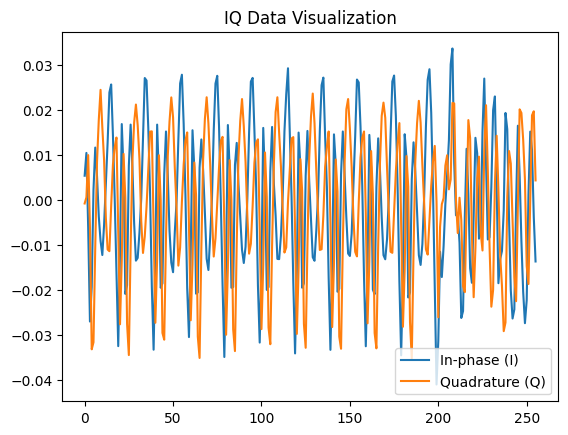

In [28]:
# Visualization
fig, ax = plt.subplots()

ax.plot(range(len(i_data)), i_data, label='In-phase (I)')
ax.plot(range(len(q_data)), q_data, label='Quadrature (Q)')

ax.legend()
ax.set_title('IQ Data Visualization')

plt.show()

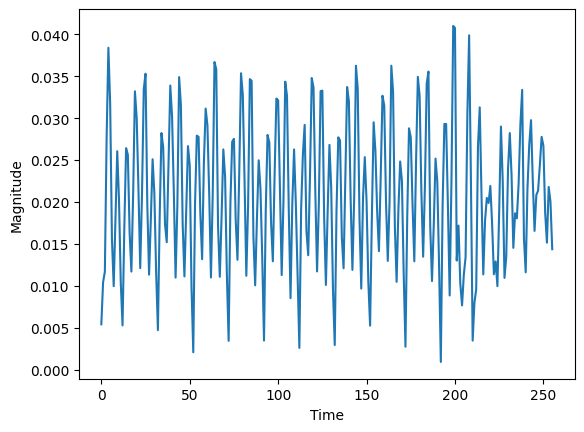

In [29]:
# plot the singal in time domain
plt.plot(np.abs(x))

plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

**Fast Fourier Transform (FFT)**

The Fast Fourier Transform (FFT) is an efficient algorithm used to compute the discrete Fourier transform (DFT) of a sequence or signal. The DFT is a sampled version of the continuous Fourier transform. The FFT reduces the computational complexity of the DFT from O(N^2) to O(N log N), where N is the number of samples in the sequence.

The **Fourier transform** is a mathematical technique used to transform a function of time (or space) into a function of frequency. It allows us to analyze the frequency components present in a signal. The Fourier transform decomposes a complex waveform into a sum of sine and cosine waves of different frequencies, which are represented in the frequency domain.

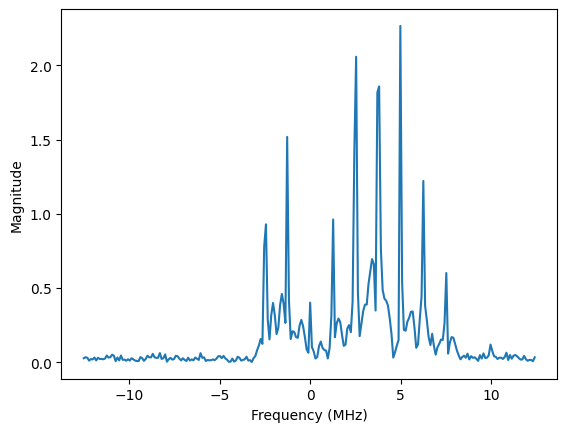

In [30]:
# sample rate
f = 25e6

# Fourier transform and move the zero frequency (DC component) to the center of the spectrum
signal_spectrum = np.fft.fftshift(np.fft.fft(x))

# frequency
freqs = np.fft.fftshift(np.fft.fftfreq(len(x), d=1.0/f))

# in MHz
plt.plot(freqs/1e6, np.abs(signal_spectrum))

plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.show()

**Inverse Fast Fourier Transform (IFFT)**

The Inverse Fast Fourier Transform (IFFT) is the mathematical operation that performs the inverse of the Fast Fourier Transform (FFT). It converts a function in the frequency domain back to the time domain. You can compare the follwing result with the original data.

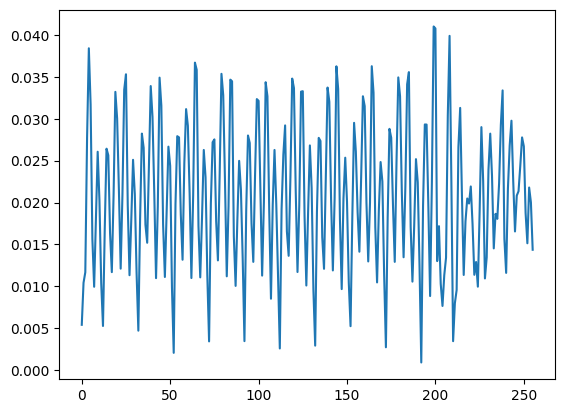

In [31]:
# IFFT
"""TO DO"""
time_signal = np.fft.ifft(signal_spectrum)

plt.plot(np.abs(time_signal))
plt.show()




**Short-Time Fourier Transform (STFT)**

The STFT extends the Fourier Transform by computing a series of Fourier Transforms over short, overlapping time windows of the signal. This allows us to analyze the frequency content of a signal as it changes over time. By using overlapping windows, we can capture more detailed information about transient events and the evolution of the signal.

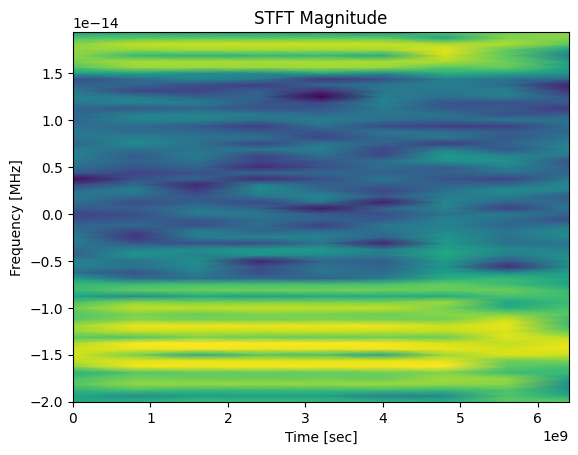

In [32]:
# STFT
from scipy.signal import stft

"""TO DO
Set your STFT parameters:
  1. Window size
  2. Window function
Plot the result.
"""

window_size = 64
window = 'hann'

# compute STFT
# Input data is complex, switching to return_onesided=False
freq, time, Zxx = stft(x, fs=1.0/f, window=window, nperseg=window_size, return_onesided=False)

# Get the magnitude spectrogram
magnitude = np.abs(Zxx)

# plot STFT
# dB: 20*np.log10
plt.pcolormesh(time, np.fft.fftshift(freq)/1e6, 20*np.log10(magnitude), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [sec]')
plt.show()

### Fingerprinting System

In [33]:
domains = [key for key in wisig_data['data']]  # 4 domains
labels = [key for key in wisig_data['data'][1]]  # 130 devices

In [34]:
# Extract data and labels from assigned domains
def get_data_labels(wisig_data, domain_list, label_list):
    data = np.empty((0,2,256))
    labels = np.array([])
    for domain in domain_list:
        for label in label_list:
            data = np.vstack((data, wisig_data['data'][domain][label]))
            labels = np.append(labels, len(wisig_data['data'][domain][label]) * [label])
    return data, labels

In [35]:
# Use numbers 0-129 to represent 130 labels
def map_labels(support_label):
    mapping = {}
    cnt = 0
    code = 0

    encoded = np.zeros_like(support_label,dtype=int)

    for s in support_label:
        if s not in mapping:
            mapping[s] = code
            code+=1
        encoded[cnt]=mapping[s]
        cnt+=1
    return encoded

In [36]:
from torch.utils.data import Dataset, DataLoader

# build dataset
class MyDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index):
        x = self.data[index, :, :, :]
        y = self.label[index]
        return x, int(y)

    def get_labels(self):
        return self.label

# build model
'''
Here, it is a simple CNN structure. For your project, you may need to amend it.
Also, you can try some more advanced deep learning paradigm such as LSTM, CNN+LSTM, ResNet, transformer
'''

# class MyCNN(nn.Module):
#     def __init__(self, in_channels=1, num_classes=130):
#         super(MyCNN,self).__init__()

#         self.in_channels = in_channels
#         # define model architecture
#         """TO DO: you can define your own structure or modify the parameters"""
#         self.conv1 = nn.Conv2d(in_channels,256,kernel_size=(1,7),stride=1,padding=(0,3),bias=False)
#         self.bn1 = nn.BatchNorm2d(256)
#         self.conv2 = nn.Conv2d(256,80,kernel_size=(2,7),stride=1,padding=(0,3),bias=False)
#         self.bn2 = nn.BatchNorm2d(80)
#         self.conv3 = nn.Conv2d(80,20,kernel_size=(1,7),stride=1,padding=(0,3),bias=False)
#         self.bn3 = nn.BatchNorm2d(20)

#         self.flatten = nn.Flatten()

#         # linear layers to output results
#         self.classifier = nn.Sequential(nn.Linear(20*256,256), nn.BatchNorm1d(256), nn.ReLU(),
#                                        nn.Linear(256,num_classes))

#     def forward(self,x):
#         # Feed forward
#         out = F.relu(self.bn1(self.conv1(x)))
#         out = F.relu(self.bn2(self.conv2(out)))
#         out = F.relu(self.bn3(self.conv3(out)))
#         out = self.classifier(self.flatten(out))
#         return out

# ResNet

import torch
import torch.nn as nn

class ResidualBlock(nn.Module):

    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.downsample = None

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv2d(1, self.in_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, channels, blocks, stride):
        layers = []
        layers.append(block(self.in_channels, channels, stride))
        self.in_channels = channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


In [37]:
# Train function
def train(train_loader, test_loader, device, model, optimizer, criterion, epochs):
    """
    train_loader: dataloader of training set
    test_loader: dataloader of test set
    device: GPU or CPU
    model: your defined model
    optimizer: SGD, Adam, etc.
    criterion: how to calculate loss
    epochs: iteration epochs
    """
    for epoch in range(epochs):
        train_loss = 0.0
        avg_acc = 0
        model.train()

        for batch_idx, (data, target) in enumerate(train_loader):
            data = data.to(device,dtype=torch.float32)
            target = target.to(device).long()

            optimizer.zero_grad()

            output = model(data)

            predictions = output.argmax(dim=1,keepdim=True).squeeze()

            true_label = target
            train_acc = (predictions==true_label).sum().item()
            avg_acc += train_acc

            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * data.size(0)

        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = 100.*avg_acc / len(train_loader.dataset)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))
        print('Epoch: {} \tTraining Accuracy: {:.6f}'.format(epoch+1, train_accuracy))

        # evaluation
        model.eval()
        num_correct = 0
        output_results = np.array([])

        for i, (x,y) in enumerate(test_loader):
            x = x.to(device,dtype=torch.float32)
            y = y.type(torch.LongTensor)
            y = y.to(device)

            with torch.no_grad():
                outputs = model(x)
                output_results = np.append(output_results, torch.argmax(outputs, axis=1).cpu().numpy())

            num_correct += int((torch.argmax(outputs, axis=1) == y).sum())

        accuracy = 100*num_correct/len(test_loader.dataset)
        print("Evaluation Accuracy: {:.04f}%".format(accuracy))

Source Domain = 1,2

In [38]:
# Pick day1 and day2 as the source domains, the remaining as the target domains
source_domain = [1,2]
target_domain = [d for d in domains if d not in source_domain]

source_data, source_labels = get_data_labels(wisig_data,source_domain,labels)
target_data, target_labels = get_data_labels(wisig_data,target_domain,labels)

print("Source:", len(source_data))
print("Target:", len(target_data))

# Encode labels and set dtype=float32
source_labels = map_labels(source_labels)
target_labels = map_labels(target_labels)

source_labels = np.array(source_labels, dtype=np.float32)
target_labels = np.array(target_labels, dtype=np.float32)

# unsqueeze
source_data = np.expand_dims(source_data, axis=1)
target_data = np.expand_dims(target_data, axis=1)

print("Base Sampled WiSig Data:", source_data.shape)
print("Target Sampled WiSig Data:", target_data.shape)

source_data = np.array(source_data, dtype=np.float64)
target_data = np.array(target_data, dtype=np.float64)

Source: 135776
Target: 134840
Base Sampled WiSig Data: (135776, 1, 2, 256)
Target Sampled WiSig Data: (134840, 1, 2, 256)


In [39]:
# use gpu if you have!
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(source_data, source_labels, test_size=0.3, random_state=7)

# construct dataloader
train_dataset = MyDataset(X_train, y_train) # combine data and labels
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

test_dataset = MyDataset(X_test, y_test) # combine data and labels
test_dataloader = DataLoader(test_dataset, batch_size=64)

# test if the dataloader contains correct data format
test_features, test_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")
print(f"Train size: {len(train_dataloader.dataset)}")
print(f"Test size: {len(test_dataloader.dataset)}")

# model = ResNet(in_channels=1, num_classes=130)
model = ResNet(ResidualBlock, [2, 2, 2, 2], num_classes=130)
model = model.to(device)  # send to device

# choose your loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

Feature batch shape: torch.Size([64, 1, 2, 256])
Labels batch shape: torch.Size([64])
Train size: 95043
Test size: 40733


In [41]:
train(train_loader=train_dataloader, test_loader=test_dataloader, device=device, model=model,
      optimizer=optimizer, criterion=criterion, epochs=6)

Epoch: 1 	Training Loss: 0.826984
Epoch: 1 	Training Accuracy: 78.134108
Evaluation Accuracy: 94.5499%
Epoch: 2 	Training Loss: 0.261312
Epoch: 2 	Training Accuracy: 93.404038
Evaluation Accuracy: 96.5114%
Epoch: 3 	Training Loss: 0.199855
Epoch: 3 	Training Accuracy: 95.030670
Evaluation Accuracy: 96.1923%
Epoch: 4 	Training Loss: 0.169501
Epoch: 4 	Training Accuracy: 95.880812
Evaluation Accuracy: 96.9214%
Epoch: 5 	Training Loss: 0.159756
Epoch: 5 	Training Accuracy: 96.138590
Evaluation Accuracy: 97.0663%
Epoch: 6 	Training Loss: 0.145210
Epoch: 6 	Training Accuracy: 96.560504
Evaluation Accuracy: 96.1358%


In [42]:
# build target dataloader
target_dataset = MyDataset(target_data, target_labels) # combine data and labels
target_dataloader = DataLoader(target_dataset, batch_size=64)

# evaluation on target domains
model.eval()
num_correct = 0
output_results = np.array([])
for i, (x,y) in enumerate(target_dataloader):
    x = x.to(device,dtype=torch.float32)
    y = y.type(torch.LongTensor)
    y = y.to(device)

    with torch.no_grad():
        outputs = model(x)
        output_results = np.append(output_results, torch.argmax(outputs, axis=1).cpu().numpy())

    num_correct += int((torch.argmax(outputs, axis=1) == y).sum())

accuracy = 100*num_correct/len(target_dataloader.dataset)

print("Target Accuracy: {:.04f}%".format(accuracy))

Target Accuracy: 71.9779%


Here we only receive 78% accuracy on target domain. The domain-shift issue need to be addressed. You can do some changes on the model architecture or change a learning paradigm (e.g., Transfer learning) to improve the target domain accuracy (scalability).

### Possible Solution: Prototypical Network

In [43]:
# install easyfsl library
!pip install easyfsl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.8/72.8 kB 1.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [44]:
# prototypical network
class PTN(nn.Module):
    def __init__(self, extractor):
        super(PTN, self).__init__()
        # feature extractor
        self.extractor = extractor

    def forward(self, support_x, support_y, query_x):
        """
        Type: Tensor
        Predict query labels using labelled support input
        """
        # number of different classes from the support set
        n_way = len(torch.unique(support_y))

        # Extract the features of the support set and query set
        z_support = self.extractor.forward(support_x)
        z_query = self.extractor.forward(query_x)

        # Prototype i is the mean of all support features vectors with label i
        z_proto = torch.cat([z_support[torch.nonzero(support_y==label)].mean(0) for label in range(n_way)])

        # Compute the Euclidean distance
        dists = torch.cdist(z_query, z_proto)

        scores = -dists
        return scores

In [45]:
ptn = PTN(extractor=model).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ptn.parameters(),lr=0.001,weight_decay=0.0001)

In [46]:
from easyfsl.samplers import TaskSampler

# Hyper-parameters in FSL (N way K shot)
N_WAY = 130
N_SHOT = 5
N_QUERY = 2
N_EVALUATION_TASKS = 20

# use sampler to build new dataloader for FSL
def get_loader(target_sampled_array, target_sampled_label_array):
    test_set = MyDataset(torch.tensor(target_sampled_array), target_sampled_label_array)
    test_sampler = TaskSampler(test_set,n_way=N_WAY,n_shot=N_SHOT,
                              n_query=N_QUERY,n_tasks=N_EVALUATION_TASKS)
    test_loader = DataLoader(test_set,batch_sampler=test_sampler,
                             collate_fn=test_sampler.episodic_collate_fn)
    return test_loader

In [47]:
target_loader = get_loader(target_data, target_labels)

In [48]:
def evaluate_on_one_task(model,support_images,support_labels,query_images,query_labels):
    """
    INPUT: torch.Tensor
    OUTPUT: [int,int]
    Returns the number of correct predictions of query labels, and the total number of predictions
    """
    example_scores = model(support_images.to(device,dtype=torch.float32),
                           support_labels.to(device),

                           query_images.to(device,dtype=torch.float32))
    _, example_predicted_labels = torch.max(example_scores.data, 1)
    num_correct = (example_predicted_labels==query_labels.to(device)).sum().item()
    return num_correct, len(query_labels)

def evaluate(data_loader, model):
    # Count everything and compute the ratio at the end
    total_predictions = 0
    correct_predictions = 0

    # eval mode affects the behavior of some layers (batch norm, dropout)
    # no_grad() tells torch not to keep in memory the whole computational graph (more lightweight)
    model.eval()
    with torch.no_grad():
        for episode_index, (support_images,support_labels,
                           query_images,query_labels,class_ids) in tqdm(enumerate(data_loader),total=len(data_loader)):
            correct, total = evaluate_on_one_task(model,support_images,support_labels,query_images,query_labels)

            total_predictions += total
            correct_predictions += correct
    print(f"Model test on {len(data_loader)}tasks. Accuracy: {(100*correct_predictions/total_predictions):.3f}%")
    return correct_predictions/total_predictions

Training

In [49]:
# Hyper-parameters in FSL (N way K shot)
N_TRAINING_EPISODES = 50 # len(train_loader)
N_WAY = 130
N_SHOT = 5
N_QUERY = 10

train_set = MyDataset(torch.tensor(source_data), source_labels)
train_sampler = TaskSampler(train_set,n_way=N_WAY,n_shot=N_SHOT,
                          n_query=N_QUERY,n_tasks=N_TRAINING_EPISODES)
train_loader = DataLoader(train_set,batch_sampler=train_sampler,
                         collate_fn=train_sampler.episodic_collate_fn)

In [50]:
def fit(model,support_images,support_labels,query_images,query_labels):
    """
    INPUT: Tensor
    OUTPUT: Float
    """
    optimizer.zero_grad()
    classification_scores = model(support_images.to(device,dtype=torch.float32),
                                  support_labels.to(device),
                                  query_images.to(device,dtype=torch.float32))
    loss = criterion(classification_scores, query_labels.to(device))
    loss.backward()
    optimizer.step()
    return loss.item()

In [51]:
# TRAINING
from easyfsl.utils import sliding_average
from tqdm import tqdm

def train_fsl(model, train_loader):
    log_update_frequency = 10
    all_loss = []

    model.train()
    with tqdm(enumerate(train_loader),total=len(train_loader)) as tqdm_train:
        for episode_index, (support_images,support_labels,query_images,query_labels,_) in enumerate(train_loader):
            loss_value = fit(model,support_images,support_labels,query_images,query_labels)
            all_loss.append(loss_value)

            if episode_index % log_update_frequency == 0:
                tqdm_train.set_postfix(loss=sliding_average(all_loss, log_update_frequency))

In [52]:
for i in range(7):
    print('Epoch: ', i)
    train_fsl(ptn,train_loader)
    evaluate(train_loader,ptn)
    acc_list = []
    acc_list.append(evaluate(target_loader,ptn))

    print('------------------------')
    print('Average accuracy: ', np.mean(acc_list))
    print('------------------------')

Epoch:  0


100%|██████████| 50/50 [00:13<00:00,  3.72it/s]


Model test on 50tasks. Accuracy: 96.183%


100%|██████████| 20/20 [00:02<00:00,  7.88it/s]


Model test on 20tasks. Accuracy: 84.192%
------------------------
Average accuracy:  0.8419230769230769
------------------------
Epoch:  1


100%|██████████| 50/50 [00:13<00:00,  3.70it/s]


Model test on 50tasks. Accuracy: 96.885%


100%|██████████| 20/20 [00:02<00:00,  7.87it/s]


Model test on 20tasks. Accuracy: 84.462%
------------------------
Average accuracy:  0.8446153846153847
------------------------
Epoch:  2


100%|██████████| 50/50 [00:13<00:00,  3.78it/s]


Model test on 50tasks. Accuracy: 97.129%


100%|██████████| 20/20 [00:02<00:00,  7.42it/s]


Model test on 20tasks. Accuracy: 85.481%
------------------------
Average accuracy:  0.8548076923076923
------------------------
Epoch:  3


100%|██████████| 50/50 [00:13<00:00,  3.75it/s]


Model test on 50tasks. Accuracy: 97.168%


100%|██████████| 20/20 [00:02<00:00,  7.81it/s]


Model test on 20tasks. Accuracy: 85.327%
------------------------
Average accuracy:  0.8532692307692308
------------------------
Epoch:  4


100%|██████████| 50/50 [00:13<00:00,  3.72it/s]


Model test on 50tasks. Accuracy: 97.088%


100%|██████████| 20/20 [00:02<00:00,  7.17it/s]


Model test on 20tasks. Accuracy: 84.288%
------------------------
Average accuracy:  0.8428846153846153
------------------------
Epoch:  5


100%|██████████| 50/50 [00:13<00:00,  3.68it/s]


Model test on 50tasks. Accuracy: 97.100%


100%|██████████| 20/20 [00:02<00:00,  6.93it/s]


Model test on 20tasks. Accuracy: 85.558%
------------------------
Average accuracy:  0.8555769230769231
------------------------
Epoch:  6


100%|██████████| 50/50 [00:13<00:00,  3.73it/s]


Model test on 50tasks. Accuracy: 96.931%


100%|██████████| 20/20 [00:02<00:00,  7.87it/s]

Model test on 20tasks. Accuracy: 84.673%
------------------------
Average accuracy:  0.8467307692307692
------------------------


The highest accuracy is about 85%. Much higher than regular CNN (78%).

In [53]:
# Randomly extract num_shots data per class form target domains
num_shots = 10

def sample_data(array, label_array, num_samples_per_class):
    # Sample num_samples_per_class from each class randomly
    sampled_array = np.empty((0,2,256))
    sampled_label_array = np.array([])
    for l in np.unique(label_array):
        idx = np.random.choice(np.where(label_array==l)[0], num_samples_per_class, replace=False)
        sampled_array = np.concatenate((sampled_array, array[idx]), axis=0)
        sampled_label_array = np.concatenate((sampled_label_array, label_array[idx]), axis=0)
    return sampled_array, sampled_label_array

target_fine_tune_array, target_fine_tune_label_array = sample_data(np.squeeze(target_data,axis=1), target_labels, num_shots)

In [54]:
# unsqueeze the first dimension
target_fine_tune_array = np.expand_dims(target_fine_tune_array, axis=1)
target_fine_tune_label_array = target_fine_tune_label_array.astype(np.float32)

# Fine tuning on target domains
from easyfsl.samplers import TaskSampler

def get_fsl_loader(data_array, label_array, n_way, n_shot, n_query, n_tasks):
    dataset = MyDataset(torch.tensor(data_array), label_array)
    sampler = TaskSampler(dataset,n_way=n_way,n_shot=n_shot,
                          n_query=n_query,n_tasks=n_tasks)
    loader = DataLoader(dataset,batch_sampler=sampler,
                         collate_fn=sampler.episodic_collate_fn)
    return loader

N_TRAINING_EPISODES = 30 # len(train_loader)
N_WAY = 130
N_SHOT = 5
N_QUERY = 2

In [55]:
tune_loader = get_fsl_loader(target_fine_tune_array, target_fine_tune_label_array, N_WAY, N_SHOT, N_QUERY, N_TRAINING_EPISODES)

In [56]:
def tune_fsl(model, train_loader):
    all_loss = []

    model.train()
    for episode_index, (support_images,support_labels,query_images,query_labels,_) in enumerate(train_loader):
        loss_value = fit(model,support_images,support_labels,query_images,query_labels)
        all_loss.append(loss_value)

# Fine-tune on all domains
def fine_tuning(model, target_loader, test_loader, epoch, episode):
    """
    :param model: the model to be fine-tuned
    :epoch: the number of epochs to be fine-tuned
    """
    print('-----------------Fine-tuning-----------------')
    acc_list = []
    for e in range(epoch):
        for i in range(episode):
            tune_fsl(model, target_loader)
        acc_list.append(evaluate(test_loader,model))
    return acc_list

In [ ]:
acc_list_1 = fine_tuning(ptn, tune_loader, target_loader, 4, 10)

-----------------Fine-tuning-----------------


100%|██████████| 20/20 [00:02<00:00,  7.74it/s]


Model test on 20tasks. Accuracy: 94.846%


100%|██████████| 20/20 [00:02<00:00,  6.99it/s]


Model test on 20tasks. Accuracy: 93.962%


After fine-tuning, the accuracy can be increased to ~89%.

You can try to improve the accuracy of the target domain by modifying the model structure, using different learning patterns, and adjusting various parameters and hyper-parameters.

> Indented block

